In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

2025-02-21 00:47:25.718354: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 00:47:25.741310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740070045.756886  309429 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740070045.761927  309429 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-21 00:47:25.784700: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
file_path = 'pima-indians-diabetes.data'
pima = np.loadtxt(file_path, delimiter=',')

pima[np.where(pima[:,0] > 8), 0] = 8  

pima[np.where(pima[:,7] <= 30), 7] = 1 
pima[np.where((pima[:,7] > 30) & (pima[:,7] <= 40)), 7] = 2 
pima[np.where((pima[:,7] > 40) & (pima[:,7] <= 50)), 7] = 3 
pima[np.where((pima[:,7] > 50) & (pima[:,7] <= 60)), 7] = 4 
pima[np.where(pima[:,7] > 60), 7] = 5 

pima[:, :8] = pima[:, :8] - pima[:, :8].mean(axis=0)
pima[:, :8] = pima[:, :8] / pima[:, :8].var(axis=0)

trainin = pima[::2, :8]  
testin = pima[1::2, :8]  
traintgt = pima[::2, 8]  
testtgt = pima[1::2, 8]   

In [3]:
# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")

GPU is available


In [31]:
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'accuracy'])


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(trainin, traintgt, epochs=100, batch_size=10, verbose=1, validation_data=(testin, testtgt))


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4229 - loss: 0.7674 - mse: 0.2831 - val_accuracy: 0.6719 - val_loss: 0.6301 - val_mse: 0.2195
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6770 - loss: 0.6359 - mse: 0.2217 - val_accuracy: 0.6719 - val_loss: 0.6112 - val_mse: 0.2116
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6993 - loss: 0.5935 - mse: 0.2020 - val_accuracy: 0.6719 - val_loss: 0.6017 - val_mse: 0.2077
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6681 - loss: 0.6113 - mse: 0.2112 - val_accuracy: 0.6771 - val_loss: 0.5958 - val_mse: 0.2053
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7002 - loss: 0.5958 - mse: 0.2053 - val_accuracy: 0.6901 - val_loss: 0.5884 - val_mse: 0.2019
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.6061 - mse: 0.2110 - val_accuracy: 0.6823 - val_loss: 0.5868 - val_mse: 0.2014
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

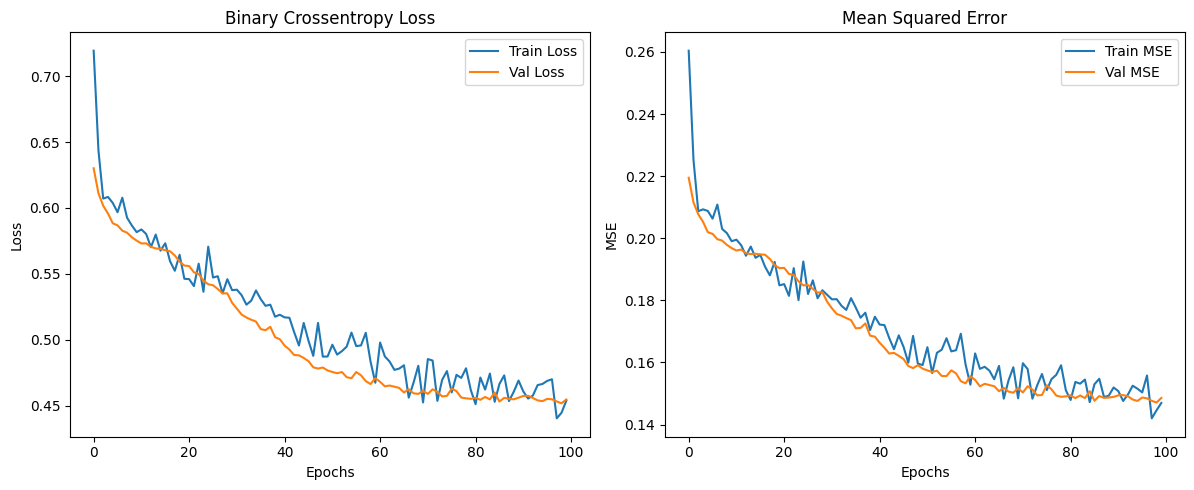

In [35]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

train_mse  = history.history['mse']
val_mse    = history.history['val_mse']

# 繪製圖表
plt.figure(figsize=(18, 5))

# 1. Binary Crossentropy Loss
plt.subplot(1, 3, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Binary Crossentropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 2. MSE
plt.subplot(1, 3, 2)
plt.plot(train_mse, label='Train MSE')
plt.plot(val_mse, label='Val MSE')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()


plt.tight_layout()
plt.show()


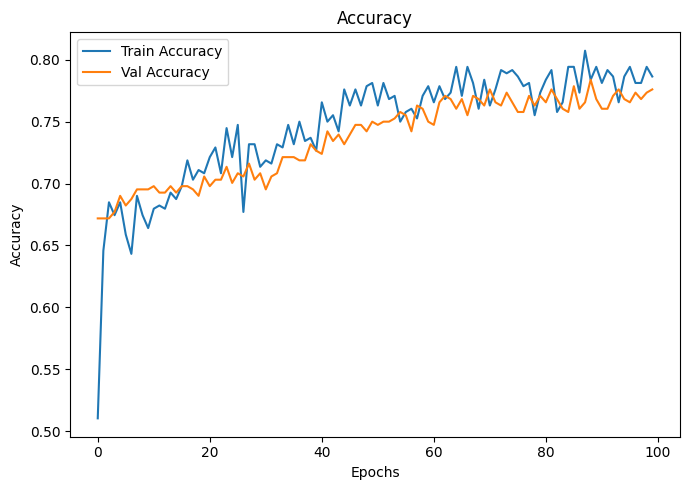

In [43]:

# 3. Accuracy
plt.figure(figsize=(7, 5))  
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
loss, mse, accuracy = model.evaluate(testin, testtgt, verbose=0)

print(f"Loss (Binary Crossentropy): {loss}")
print(f"Accuracy: {accuracy}")
print(f"MSE: {mse}")

Loss (Binary Crossentropy): 0.4546477496623993
Accuracy: 0.7760416865348816
MSE: 0.14855331182479858
